# CIFAR10 Dataset Exploration

Ironhack Project 1

[Github repo](https://github.com/ironhack-labs/project-1-deep-learning-image-classification-with-cnn)  |  [My repo](https://github.com/alexdjulin/ik-p1-image-classification-with-cnn)

Notes:
- transfer learnings:
- initialise the network with random weigths to compare before and after transfer learning

## Load modules

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import to_categorical

## Load dataset

In [31]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (50000, 1))

## Visualise dataset

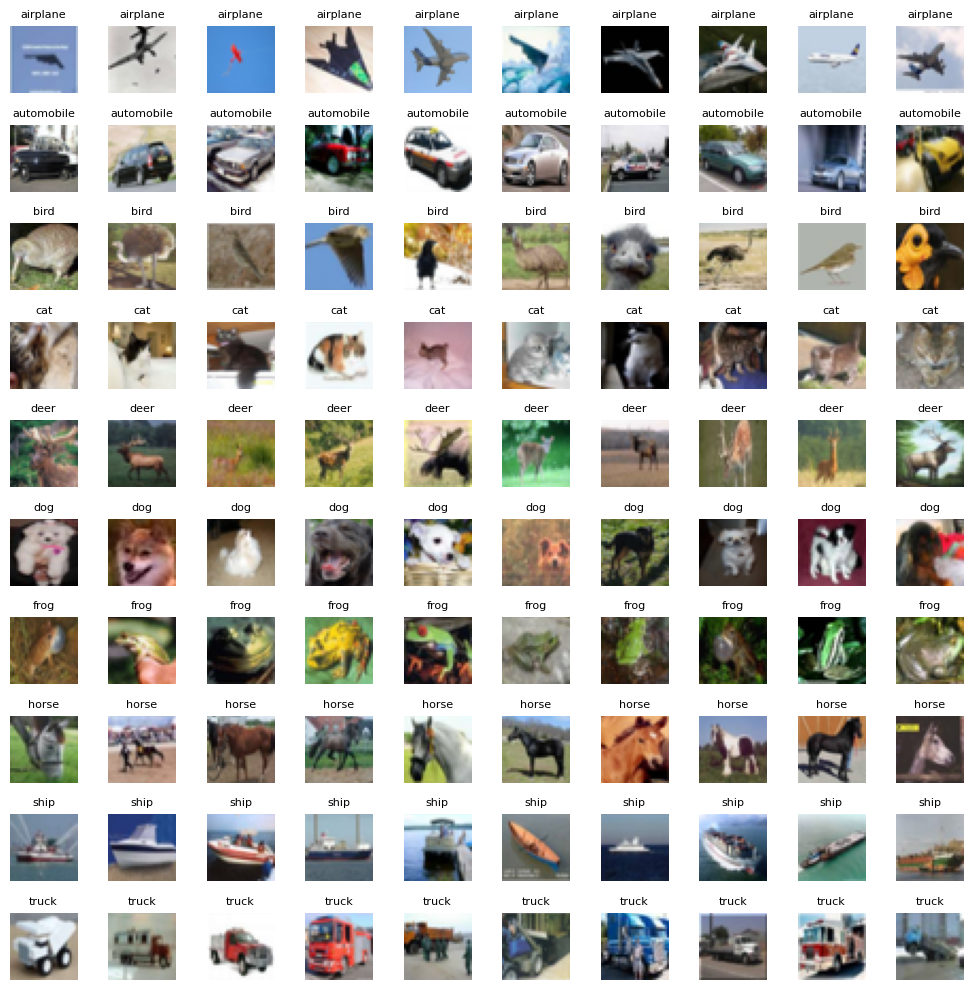

In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_random_images(x_data, y_data, num_images=10, image_size=(1, 1)):

    num_categories = len(class_names)

    # Create a figure with subplots
    _, axes = plt.subplots(num_categories, num_images, figsize=(num_images * image_size[0], num_categories * image_size[1]))

    # Loop through each category
    for i in range(num_categories):

        # Find indices of images belonging to the current category
        indices = np.where(y_data == i)[0]

        # Randomly choose 'num_images' indices
        chosen_indices = np.random.choice(indices, num_images, replace=False)

        # Loop through and plot the images
        for j, index in enumerate(chosen_indices):
            axes[i, j].imshow(x_data[index], cmap='gray')
            axes[i, j].set_title(class_names[i], fontsize=8)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()


plot_random_images(x_train, y_train)

## Prepare dataset

In [33]:
# one-hot-encoding labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print(y_train_cat.shape, y_test_cat.shape)
y_train_cat[:10]

(50000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
# Normalize the images
# color channels should be normalized (0-255) to (0-1)
x_train_norm = x_train.astype("float32") / 255
x_test_norm = x_test.astype("float32") / 255